In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("spam.csv", encoding = "latin-1")

In [3]:
data.head(5)

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.columns

Index(['class', 'message', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [7]:
data.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data['class']=data['class'].map({'ham':0, 'spam':1})

In [9]:
data.head()

,class,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


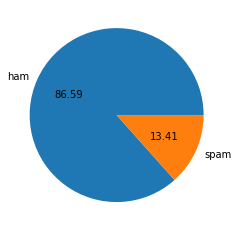

In [10]:
import matplotlib.pyplot as plt
plt.pie(data['class'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
cv=CountVectorizer()

In [13]:
x=data["message"]
y=data["class"]

In [14]:
x.shape

(5572,)

In [15]:
y.shape

(5572,)

In [16]:
x=cv.fit_transform(x)

In [17]:
x

<5572x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73916 stored elements in Compressed Sparse Row format>

1.The Cat
2.The Dog
3.The Bird

    The  Cat  Dog  Bird
1.   1    1    0    0
2.   1    0    1    0
3.   1    0    0    1

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test,y_train, y_test=train_test_split(x,y, test_size=0.2)

In [20]:
x_train.shape

(4457, 8672)

In [21]:
from sklearn.naive_bayes import MultinomialNB

In [22]:
model=MultinomialNB()

In [23]:
model.fit(x_train, y_train)

MultinomialNB()

In [24]:
result = model.score(x_test, y_test)

In [25]:
result= result*100

In [26]:
result

98.65470852017937

In [27]:
import pickle

In [28]:
pickle.dump(model, open('spam.pkl','wb'))

In [29]:
pickle.dump(cv, open('Vectorizer','wb'))

In [30]:
clf = pickle.load(open('spam.pkl','rb'))

In [31]:
clf

MultinomialNB()

In [32]:
msg="you win $1000"
data = [msg]
vect = cv.transform(data).toarray()
my_prediction = model.predict(vect)
print(my_prediction)

[1]
